# COMP472 Assignment 1
### Bernard Claveau 40065756 and Nicolas Eliopoulos 40059378

<br>
<div style="border-bottom: 3px solid black"></div>

## Setup

### Import the libraries

In [8]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import csv
import sklearn.metrics as metrics

### Declare the output files

In [9]:
gnb_out_1 = 'out/GNB-DS1.csv'
gnb_out_2 = 'out/GNB-DS2.csv'

dt_out_1 = 'out/Base-DT-DS1.csv'
dt_out_2 = 'out/Base-DT-DS2.csv'

bdt_out_1 = 'out/Best-DT-DS1.csv'
bdt_out_2 = 'out/Best-DT-DS2.csv'

per_out_1 = 'out/PER-DS1.csv'
per_out_2 = 'out/PER-DS2.csv'

mlp_out_1 = 'out/Base-MLP-DS1.csv'
mlp_out_2 = 'out/Base-MLP-DS2.csv'

bmlp_out_1 = 'out/Best-MLP-DS1.csv'
bmlp_out_2 = 'out/Best-MLP-DS2.csv'

### Write the functions
We define some functions to help us write our output to a CSV file.

In [10]:
latin_alphabet = ['class','A','B','C','D','E','F','G','H','I','J','K','L','M',
                  'N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
greek_alphabet = ['class', 'pi', 'alpha', 'beta', 'sigma', 'gamma', 'delta', 'lambda', 'omega', 'mu', 'xi']

# Writes the results of any of the six given metrics to csv 
# 'metric' argument should be one of: precision, recall, f1-score, accuracy, f1-score-macro, f1-score-weighted
def write_metric(file, metric, values, iterable=True):
    with open(file, 'a', newline='') as f:
        writer = csv.writer(f, delimiter=',', quotechar='|')
        if iterable:
            li = values.tolist()
            li.insert(0, metric)
            writer.writerow(li)
        else:
            writer.writerow([metric, values])

# Writes a confusion matrix to csv
def write_confusion_matrix(file, cm, *, alphabet):
    with open(file, 'a', newline='') as f:
        writer = csv.writer(f, delimiter=',', quotechar='|')
        writer.writerow('')
        writer.writerow(['confusion matrix'])
        if alphabet == 'latin':
            writer.writerow(latin_alphabet)
            for i in range(26):
                li = cm[i].tolist()
                li.insert(0, latin_alphabet[i+1])
                writer.writerow(li)
        elif alphabet == 'greek':
            writer.writerow(greek_alphabet)
            for i in range (10):
                li = cm[i].tolist()
                li.insert(0, greek_alphabet[i+1])
                writer.writerow(li)
            
# Writes the class names of the specified type to csv
def write_class(file, *, alphabet):
    with open(file, 'a', newline='') as f:
        writer = csv.writer(f, delimiter=',', quotechar='|')
        writer.writerow('')
        if alphabet == 'latin':
            writer.writerow(latin_alphabet)
        elif alphabet == 'greek':
            writer.writerow(greek_alphabet)

### Read the files
We store our training data and test data in DataFrame objects.

In [11]:
df_train_1 = pd.read_csv('dataset/train_1.csv', header=None)
df_train_2 = pd.read_csv('dataset/train_2.csv', header=None)

df_test_with_label_1 = pd.read_csv('dataset/test_with_label_1.csv', header=None)
df_test_with_label_2 = pd.read_csv('dataset/test_with_label_2.csv', header=None)

### Get the data
We separate the feature values from the labels (classification).

In [12]:
#training data
labels_1 = df_train_1[1024]
labels_2 = df_train_2[1024]
features_1 = df_train_1.iloc[:,:-1]
features_2 = df_train_2.iloc[:,:-1]

#test data
labels_test_1 = df_test_with_label_1[1024]
labels_test_2 = df_test_with_label_2[1024]
features_test_1 = df_test_with_label_1.iloc[:,:-1]
features_test_2 = df_test_with_label_2.iloc[:,:-1]

### Plot the class distribution

The histogram below plots the distribution of the number of instances in each class for training set 1.<br>
Classes 0, 1, 2, ..., 25 correspond to letters A, B, C, ..., Z.

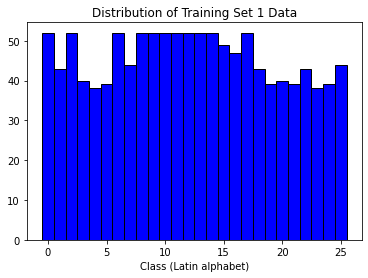

In [6]:
plt.hist(labels_1, color = 'blue', edgecolor = 'black', bins=range(0,27), align='left', rwidth=1)
plt.xlabel('Class (Latin alphabet)')
plt.title('Distribution of Training Set 1 Data')
plt.show()

The histogram below plots the dsitribution of the number of instances in each class for training set 2.<br>
The classes represent the following Greek letters:<br>
0 = pi<br>
1 = alpha<br>
2 = beta<br>
3 = sigma<br>
4 = gamma<br>
5 = delta<br>
6 = lambda<br>
7 = omega<br>
8 = mu<br>
9 = xi

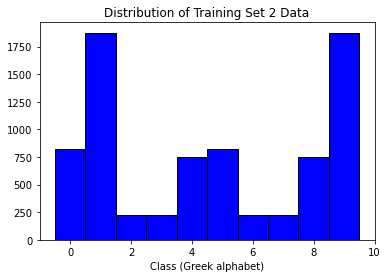

In [7]:
plt.hist(labels_2, color = 'blue', edgecolor = 'black', bins=range(0,11), align='left', rwidth=1)
plt.xlabel('Class (Greek alphabet)')
plt.title('Distribution of Training Set 2 Data')
plt.show()

## Gaussian Naive Bayes Classifier (GNB)

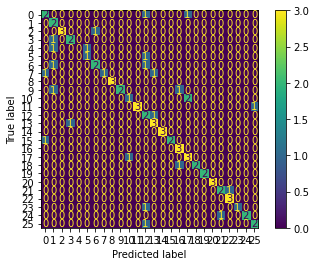

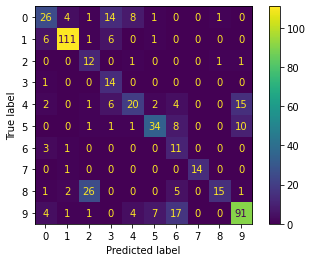

In [22]:
from sklearn.naive_bayes import GaussianNB

# Create the models
gnb_1 = GaussianNB()
gnb_2 = GaussianNB()

# Train the models
gnb_1 = gnb_1.fit(features_1, labels_1)
gnb_2 = gnb_2.fit(features_2, labels_2)

# Run the test data through the models
gnb_prediction_1 = gnb_1.predict(features_test_1)
gnb_prediction_2 = gnb_2.predict(features_test_2)

# Compute the evaluation metrics
gnb_confusion_matrix_1 = metrics.confusion_matrix(labels_test_1, gnb_prediction_1)
gnb_confusion_matrix_2 = metrics.confusion_matrix(labels_test_2, gnb_prediction_2)

gnb_prec_1 = metrics.precision_score(labels_test_1, gnb_prediction_1, average=None, zero_division=0)
gnb_prec_2 = metrics.precision_score(labels_test_2, gnb_prediction_2, average=None, zero_division=0)

gnb_recall_1 = metrics.recall_score(labels_test_1, gnb_prediction_1, average=None)
gnb_recall_2 = metrics.recall_score(labels_test_2, gnb_prediction_2, average=None)

gnb_f1_1 = metrics.f1_score(labels_test_1, gnb_prediction_1, average=None)
gnb_f1_2 = metrics.f1_score(labels_test_2, gnb_prediction_2, average=None)

gnb_acc_1 = metrics.accuracy_score(labels_test_1, gnb_prediction_1)
gnb_acc_2 = metrics.accuracy_score(labels_test_2, gnb_prediction_2)

gnb_f1_macro_1 = metrics.f1_score(labels_test_1, gnb_prediction_1, average='macro')
gnb_f1_macro_2 = metrics.f1_score(labels_test_2, gnb_prediction_2, average='macro')

gnb_f1_weighted_1 = metrics.f1_score(labels_test_1, gnb_prediction_1, average='weighted')
gnb_f1_weighted_2 = metrics.f1_score(labels_test_2, gnb_prediction_2, average='weighted')


# Write predictions to the output files
df_gnb_prediction_1 = pd.DataFrame(gnb_prediction_1)
df_gnb_prediction_1.to_csv(gnb_out_1, header=None)

df_gnb_prediction_2 = pd.DataFrame(gnb_prediction_2)
df_gnb_prediction_2.to_csv(gnb_out_2, header=None)

# Write the metrics results to the output files
write_class(gnb_out_1, alphabet='latin')
write_metric(gnb_out_1, 'precision', gnb_prec_1)
write_metric(gnb_out_1, 'recall', gnb_recall_1)
write_metric(gnb_out_1, 'f1-score', gnb_f1_1)
write_metric(gnb_out_1, 'accuracy', gnb_acc_1, iterable=False)
write_metric(gnb_out_1, 'f1 macro', gnb_f1_macro_1, iterable=False)
write_metric(gnb_out_1, 'f1 weighted average', gnb_f1_weighted_1, iterable=False)
write_confusion_matrix(gnb_out_1, gnb_confusion_matrix_1, alphabet='latin')

write_class(gnb_out_2, alphabet='greek')
write_metric(gnb_out_2, 'precision', gnb_prec_2)
write_metric(gnb_out_2, 'recall', gnb_recall_2)
write_metric(gnb_out_2, 'f1-score', gnb_f1_2)
write_metric(gnb_out_2, 'accuracy', gnb_acc_2, iterable=False)
write_metric(gnb_out_2, 'f1 macro', gnb_f1_macro_2, iterable=False)
write_metric(gnb_out_2, 'f1 weighted average', gnb_f1_weighted_2, iterable=False)
write_confusion_matrix(gnb_out_2, gnb_confusion_matrix_2, alphabet='greek')

# Display the confusion matrices in this notebook
metrics.plot_confusion_matrix(gnb_1, features_test_1, labels_test_1)
metrics.plot_confusion_matrix(gnb_2, features_test_2, labels_test_2)

## Baseline Decision Tree (Base-DT)

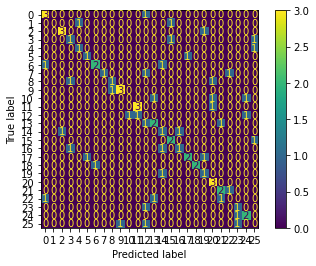

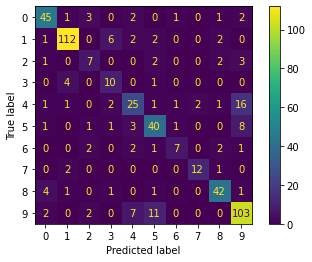

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create the models
dt_1 = DecisionTreeClassifier(criterion='entropy')
dt_2 = DecisionTreeClassifier(criterion='entropy')

# Train the models
dt_1 = dt_1.fit(features_1, labels_1)
dt_2 = dt_2.fit(features_2, labels_2)

# Run the test data through the models
dt_prediction_1 = dt_1.predict(features_test_1)
dt_prediction_2 = dt_2.predict(features_test_2)

# Compute the evaluation metrics
dt_confusion_matrix_1 = metrics.confusion_matrix(labels_test_1, dt_prediction_1)
dt_confusion_matrix_2 = metrics.confusion_matrix(labels_test_2, dt_prediction_2)

dt_prec_1 = metrics.precision_score(labels_test_1, dt_prediction_1, average=None, zero_division=0)
dt_prec_2 = metrics.precision_score(labels_test_2, dt_prediction_2, average=None, zero_division=0)

dt_recall_1 = metrics.recall_score(labels_test_1, dt_prediction_1, average=None)
dt_recall_2 = metrics.recall_score(labels_test_2, dt_prediction_2, average=None)

dt_f1_1 = metrics.f1_score(labels_test_1, dt_prediction_1, average=None)
dt_f1_2 = metrics.f1_score(labels_test_2, dt_prediction_2, average=None)

dt_acc_1 = metrics.accuracy_score(labels_test_1, dt_prediction_1)
dt_acc_2 = metrics.accuracy_score(labels_test_2, dt_prediction_2)

dt_f1_macro_1 = metrics.f1_score(labels_test_1, dt_prediction_1, average='macro')
dt_f1_macro_2 = metrics.f1_score(labels_test_2, dt_prediction_2, average='macro')

dt_f1_weighted_1 = metrics.f1_score(labels_test_1, dt_prediction_1, average='weighted')
dt_f1_weighted_2 = metrics.f1_score(labels_test_2, dt_prediction_2, average='weighted')


# Write predictions to the output files
df_dt_prediction_1 = pd.DataFrame(dt_prediction_1)
df_dt_prediction_1.to_csv(dt_out_1, header=None)

df_dt_prediction_2 = pd.DataFrame(dt_prediction_2)
df_dt_prediction_2.to_csv(dt_out_2, header=None)

# Write the metrics results to the output files
write_class(dt_out_1, alphabet='latin')
write_metric(dt_out_1, 'precision', dt_prec_1)
write_metric(dt_out_1, 'recall', dt_recall_1)
write_metric(dt_out_1, 'f1-score', dt_f1_1)
write_metric(dt_out_1, 'accuracy', dt_acc_1, iterable=False)
write_metric(dt_out_1, 'f1 macro', dt_f1_macro_1, iterable=False)
write_metric(dt_out_1, 'f1 weighted average', dt_f1_weighted_1, iterable=False)
write_confusion_matrix(dt_out_1, dt_confusion_matrix_1, alphabet='latin')

write_class(dt_out_2, alphabet='greek')
write_metric(dt_out_2, 'precision', dt_prec_2)
write_metric(dt_out_2, 'recall', dt_recall_2)
write_metric(dt_out_2, 'f1-score', dt_f1_2)
write_metric(dt_out_2, 'accuracy', dt_acc_2, iterable=False)
write_metric(dt_out_2, 'f1 macro', dt_f1_macro_2, iterable=False)
write_metric(dt_out_2, 'f1 weighted average', dt_f1_weighted_2, iterable=False)
write_confusion_matrix(dt_out_2, dt_confusion_matrix_2, alphabet='greek')

# Display the confusion matrices in this notebook
metrics.plot_confusion_matrix(dt_1, features_test_1, labels_test_1)
metrics.plot_confusion_matrix(dt_2, features_test_2, labels_test_2)

## Best Decision Tree (Best-DT)

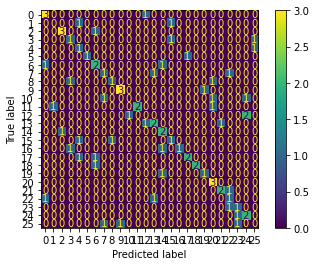

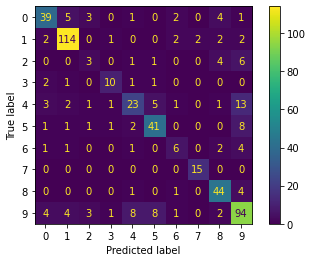

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the models
bdt_1 = DecisionTreeClassifier()
bdt_2 = DecisionTreeClassifier()

# Grid search
bdt_params = {'criterion': ['gini', 'entropy'], 
              'max_depth': [10, None], 
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
              'class_weight': ['balanced', None]}

bdt_gs_1 = GridSearchCV(bdt_1, bdt_params, n_jobs = -1)
bdt_gs_2 = GridSearchCV(bdt_2, bdt_params, n_jobs = -1)

# Train the models
bdt_gs_1.fit(features_1, labels_1)
bdt_gs_2.fit(features_2, labels_2)

# Run the test data through the models
bdt_prediction_1 = bdt_gs_1.predict(features_test_1)
bdt_prediction_2 = bdt_gs_2.predict(features_test_2)

# Compute the evaluation metrics
bdt_confusion_matrix_1 = metrics.confusion_matrix(labels_test_1, bdt_prediction_1)
bdt_confusion_matrix_2 = metrics.confusion_matrix(labels_test_2, bdt_prediction_2)

bdt_prec_1 = metrics.precision_score(labels_test_1, bdt_prediction_1, average=None, zero_division=0)
bdt_prec_2 = metrics.precision_score(labels_test_2, bdt_prediction_2, average=None, zero_division=0)

bdt_recall_1 = metrics.recall_score(labels_test_1, bdt_prediction_1, average=None)
bdt_recall_2 = metrics.recall_score(labels_test_2, bdt_prediction_2, average=None)

bdt_f1_1 = metrics.f1_score(labels_test_1, bdt_prediction_1, average=None)
bdt_f1_2 = metrics.f1_score(labels_test_2, bdt_prediction_2, average=None)

bdt_acc_1 = metrics.accuracy_score(labels_test_1, bdt_prediction_1)
bdt_acc_2 = metrics.accuracy_score(labels_test_2, bdt_prediction_2)

bdt_f1_macro_1 = metrics.f1_score(labels_test_1, bdt_prediction_1, average='macro')
bdt_f1_macro_2 = metrics.f1_score(labels_test_2, bdt_prediction_2, average='macro')

bdt_f1_weighted_1 = metrics.f1_score(labels_test_1, bdt_prediction_1, average='weighted')
bdt_f1_weighted_2 = metrics.f1_score(labels_test_2, bdt_prediction_2, average='weighted')


# Write predictions to the output files
df_bdt_prediction_1 = pd.DataFrame(bdt_prediction_1)
df_bdt_prediction_1.to_csv(bdt_out_1, header=None)

df_bdt_prediction_2 = pd.DataFrame(bdt_prediction_2)
df_bdt_prediction_2.to_csv(bdt_out_2, header=None)

# Write the metrics results to the output files
write_class(bdt_out_1, alphabet='latin')
write_metric(bdt_out_1, 'precision', bdt_prec_1)
write_metric(bdt_out_1, 'recall', bdt_recall_1)
write_metric(bdt_out_1, 'f1-score', bdt_f1_1)
write_metric(bdt_out_1, 'accuracy', bdt_acc_1, iterable=False)
write_metric(bdt_out_1, 'f1 macro', bdt_f1_macro_1, iterable=False)
write_metric(bdt_out_1, 'f1 weighted average', bdt_f1_weighted_1, iterable=False)
write_confusion_matrix(bdt_out_1, bdt_confusion_matrix_1, alphabet='latin')

write_class(bdt_out_2, alphabet='greek')
write_metric(bdt_out_2, 'precision', bdt_prec_2)
write_metric(bdt_out_2, 'recall', bdt_recall_2)
write_metric(bdt_out_2, 'f1-score', bdt_f1_2)
write_metric(bdt_out_2, 'accuracy', bdt_acc_2, iterable=False)
write_metric(bdt_out_2, 'f1 macro', bdt_f1_macro_2, iterable=False)
write_metric(bdt_out_2, 'f1 weighted average', bdt_f1_weighted_2, iterable=False)
write_confusion_matrix(bdt_out_2, bdt_confusion_matrix_2, alphabet='greek')

# Display the confusion matrices in this notebook
metrics.plot_confusion_matrix(bdt_gs_1.best_estimator_, features_test_1, labels_test_1)
metrics.plot_confusion_matrix(bdt_gs_2.best_estimator_, features_test_2, labels_test_2)

In [26]:
print('Best criterion:', bdt_gs_1.best_estimator_.get_params()['criterion'])
print('Best max_depth:', bdt_gs_1.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', bdt_gs_1.best_estimator_.get_params()['min_samples_split'])
print('Best min_impurity_decrease:', bdt_gs_1.best_estimator_.get_params()['min_impurity_decrease'])
print('Best class_weight:', bdt_gs_1.best_estimator_.get_params()['class_weight'])
print(); 

print('Best criterion:', bdt_gs_2.best_estimator_.get_params()['criterion'])
print('Best max_depth:', bdt_gs_2.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', bdt_gs_2.best_estimator_.get_params()['min_samples_split'])
print('Best min_impurity_decrease:', bdt_gs_2.best_estimator_.get_params()['min_impurity_decrease'])
print('Best class_weight:', bdt_gs_2.best_estimator_.get_params()['class_weight'])

Best criterion: entropy
Best max_depth: None
Best min_samples_split: 7
Best min_impurity_decrease: 0.0
Best class_weight: None

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
Best criterion: gini
Best max_depth: None
Best min_samples_split: 2
Best min_impurity_decrease: 0.0
Best class_weight: balanced

{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


## Perceptron (PER)

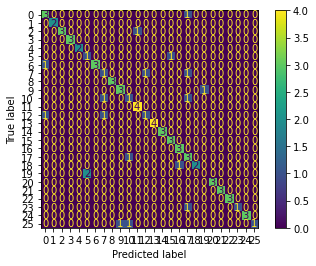

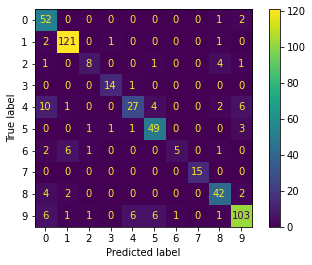

In [27]:
from sklearn.linear_model import Perceptron

# Create the models
per_1 = Perceptron()
per_2 = Perceptron()

# Train the models
per_1 = per_1.fit(features_1, labels_1)
per_2 = per_2.fit(features_2, labels_2)

# Run the test data through the models
per_prediction_1 = per_1.predict(features_test_1)
per_prediction_2 = per_2.predict(features_test_2)

# Compute the evaluation metrics
per_confusion_matrix_1 = metrics.confusion_matrix(labels_test_1, per_prediction_1)
per_confusion_matrix_2 = metrics.confusion_matrix(labels_test_2, per_prediction_2)

per_prec_1 = metrics.precision_score(labels_test_1, per_prediction_1, average=None, zero_division=0)
per_prec_2 = metrics.precision_score(labels_test_2, per_prediction_2, average=None, zero_division=0)

per_recall_1 = metrics.recall_score(labels_test_1, per_prediction_1, average=None)
per_recall_2 = metrics.recall_score(labels_test_2, per_prediction_2, average=None)

per_f1_1 = metrics.f1_score(labels_test_1, per_prediction_1, average=None)
per_f1_2 = metrics.f1_score(labels_test_2, per_prediction_2, average=None)

per_acc_1 = metrics.accuracy_score(labels_test_1, per_prediction_1)
per_acc_2 = metrics.accuracy_score(labels_test_2, per_prediction_2)

per_f1_macro_1 = metrics.f1_score(labels_test_1, per_prediction_1, average='macro')
per_f1_macro_2 = metrics.f1_score(labels_test_2, per_prediction_2, average='macro')

per_f1_weighted_1 = metrics.f1_score(labels_test_1, per_prediction_1, average='weighted')
per_f1_weighted_2 = metrics.f1_score(labels_test_2, per_prediction_2, average='weighted')


# Write predictions to the output files
df_per_prediction_1 = pd.DataFrame(per_prediction_1)
df_per_prediction_1.to_csv(per_out_1, header=None)

df_per_prediction_2 = pd.DataFrame(per_prediction_2)
df_per_prediction_2.to_csv(per_out_2, header=None)

# Write the metrics results to the output files
write_class(per_out_1, alphabet='latin')
write_metric(per_out_1, 'precision', per_prec_1)
write_metric(per_out_1, 'recall', per_recall_1)
write_metric(per_out_1, 'f1-score', per_f1_1)
write_metric(per_out_1, 'accuracy', per_acc_1, iterable=False)
write_metric(per_out_1, 'f1 macro', per_f1_macro_1, iterable=False)
write_metric(per_out_1, 'f1 weighted average', per_f1_weighted_1, iterable=False)
write_confusion_matrix(per_out_1, per_confusion_matrix_1, alphabet='latin')

write_class(per_out_2, alphabet='greek')
write_metric(per_out_2, 'precision', per_prec_2)
write_metric(per_out_2, 'recall', per_recall_2)
write_metric(per_out_2, 'f1-score', per_f1_2)
write_metric(per_out_2, 'accuracy', per_acc_2, iterable=False)
write_metric(per_out_2, 'f1 macro', per_f1_macro_2, iterable=False)
write_metric(per_out_2, 'f1 weighted average', per_f1_weighted_2, iterable=False)
write_confusion_matrix(per_out_2, per_confusion_matrix_2, alphabet='greek')

# Display the confusion matrices in this notebook
metrics.plot_confusion_matrix(per_1, features_test_1, labels_test_1)
metrics.plot_confusion_matrix(per_2, features_test_2, labels_test_2)

## Baseline Multi-Layered Perceptron (Base-MLP)

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


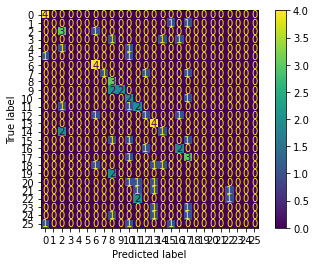

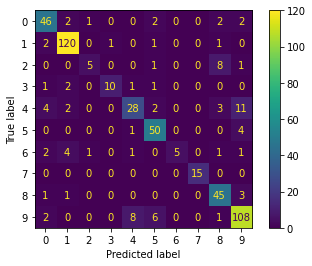

In [18]:
from sklearn.neural_network import MLPClassifier

# Create the model
mlp_1 = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd')
mlp_2 = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd')

# Train the models
mlp_1 = mlp_1.fit(features_1, labels_1)
mlp_2 = mlp_2.fit(features_2, labels_2)

# Run the test data through the models
mlp_prediction_1 = mlp_1.predict(features_test_1)
mlp_prediction_2 = mlp_2.predict(features_test_2)

# Compute the evaluation metrics
mlp_confusion_matrix_1 = metrics.confusion_matrix(labels_test_1, mlp_prediction_1)
mlp_confusion_matrix_2 = metrics.confusion_matrix(labels_test_2, mlp_prediction_2)

mlp_prec_1 = metrics.precision_score(labels_test_1, mlp_prediction_1, average=None, zero_division=0)
mlp_prec_2 = metrics.precision_score(labels_test_2, mlp_prediction_2, average=None, zero_division=0)

mlp_recall_1 = metrics.recall_score(labels_test_1, mlp_prediction_1, average=None)
mlp_recall_2 = metrics.recall_score(labels_test_2, mlp_prediction_2, average=None)

mlp_f1_1 = metrics.f1_score(labels_test_1, mlp_prediction_1, average=None)
mlp_f1_2 = metrics.f1_score(labels_test_2, mlp_prediction_2, average=None)

mlp_acc_1 = metrics.accuracy_score(labels_test_1, mlp_prediction_1)
mlp_acc_2 = metrics.accuracy_score(labels_test_2, mlp_prediction_2)

mlp_f1_macro_1 = metrics.f1_score(labels_test_1, mlp_prediction_1, average='macro')
mlp_f1_macro_2 = metrics.f1_score(labels_test_2, mlp_prediction_2, average='macro')

mlp_f1_weighted_1 = metrics.f1_score(labels_test_1, mlp_prediction_1, average='weighted')
mlp_f1_weighted_2 = metrics.f1_score(labels_test_2, mlp_prediction_2, average='weighted')


# Write predictions to the output files
df_mlp_prediction_1 = pd.DataFrame(mlp_prediction_1)
df_mlp_prediction_1.to_csv(mlp_out_1, header=None)

df_mlp_prediction_2 = pd.DataFrame(mlp_prediction_2)
df_mlp_prediction_2.to_csv(mlp_out_2, header=None)

# Write the metrics results to the output files
write_class(mlp_out_1, alphabet='latin')
write_metric(mlp_out_1, 'precision', mlp_prec_1)
write_metric(mlp_out_1, 'recall', mlp_recall_1)
write_metric(mlp_out_1, 'f1-score', mlp_f1_1)
write_metric(mlp_out_1, 'accuracy', mlp_acc_1, iterable=False)
write_metric(mlp_out_1, 'f1 macro', mlp_f1_macro_1, iterable=False)
write_metric(mlp_out_1, 'f1 weighted average', mlp_f1_weighted_1, iterable=False)
write_confusion_matrix(mlp_out_1, mlp_confusion_matrix_1, alphabet='latin')

write_class(mlp_out_2, alphabet='greek')
write_metric(mlp_out_2, 'precision', mlp_prec_2)
write_metric(mlp_out_2, 'recall', mlp_recall_2)
write_metric(mlp_out_2, 'f1-score', mlp_f1_2)
write_metric(mlp_out_2, 'accuracy', mlp_acc_2, iterable=False)
write_metric(mlp_out_2, 'f1 macro', mlp_f1_macro_2, iterable=False)
write_metric(mlp_out_2, 'f1 weighted average', mlp_f1_weighted_2, iterable=False)
write_confusion_matrix(mlp_out_2, mlp_confusion_matrix_2, alphabet='greek')

# Display the confusion matrices in this notebook
metrics.plot_confusion_matrix(mlp_1, features_test_1, labels_test_1)
metrics.plot_confusion_matrix(mlp_2, features_test_2, labels_test_2)

## Best Multi-Layered Perceptron (Best-MLP)

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nicol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


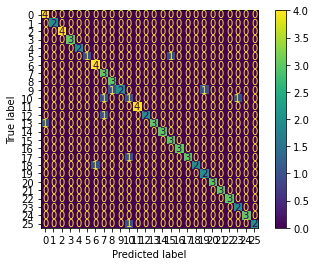

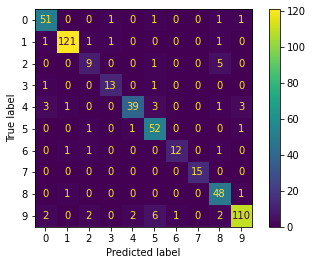

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Create the models
bmlp_1 = MLPClassifier()
bmlp_2 = MLPClassifier()


# Grid search
bmlp_params = {'hidden_layer_sizes': [(100,), (50,50)], 
               'activation': ['identity', 'logistic', 'tanh', 'relu'], 
               'solver': ['sgd', 'adam']}


bmlp_gs_1 = GridSearchCV(bmlp_1, bmlp_params, n_jobs = -1)
bmlp_gs_2 = GridSearchCV(bmlp_2, bmlp_params, n_jobs = -1)

# Train the models
bmlp_gs_1.fit(features_1, labels_1)
bmlp_gs_2.fit(features_2, labels_2)

# Run the test data through the models
bmlp_prediction_1 = bmlp_gs_1.predict(features_test_1)
bmlp_prediction_2 = bmlp_gs_2.predict(features_test_2)

# Compute the evaluation metrics
bmlp_confusion_matrix_1 = metrics.confusion_matrix(labels_test_1, bmlp_prediction_1)
bmlp_confusion_matrix_2 = metrics.confusion_matrix(labels_test_2, bmlp_prediction_2)

bmlp_prec_1 = metrics.precision_score(labels_test_1, bmlp_prediction_1, average=None, zero_division=0)
bmlp_prec_2 = metrics.precision_score(labels_test_2, bmlp_prediction_2, average=None, zero_division=0)

bmlp_recall_1 = metrics.recall_score(labels_test_1, bmlp_prediction_1, average=None)
bmlp_recall_2 = metrics.recall_score(labels_test_2, bmlp_prediction_2, average=None)

bmlp_f1_1 = metrics.f1_score(labels_test_1, bmlp_prediction_1, average=None)
bmlp_f1_2 = metrics.f1_score(labels_test_2, bmlp_prediction_2, average=None)

bmlp_acc_1 = metrics.accuracy_score(labels_test_1, bmlp_prediction_1)
bmlp_acc_2 = metrics.accuracy_score(labels_test_2, bmlp_prediction_2)

bmlp_f1_macro_1 = metrics.f1_score(labels_test_1, bmlp_prediction_1, average='macro')
bmlp_f1_macro_2 = metrics.f1_score(labels_test_2, bmlp_prediction_2, average='macro')

bmlp_f1_weighted_1 = metrics.f1_score(labels_test_1, bmlp_prediction_1, average='weighted')
bmlp_f1_weighted_2 = metrics.f1_score(labels_test_2, bmlp_prediction_2, average='weighted')


# Write predictions to the output files
df_bmlp_prediction_1 = pd.DataFrame(bmlp_prediction_1)
df_bmlp_prediction_1.to_csv(bmlp_out_1, header=None)

df_bmlp_prediction_2 = pd.DataFrame(bmlp_prediction_2)
df_bmlp_prediction_2.to_csv(bmlp_out_2, header=None)

# Write the metrics results to the output files
write_class(bmlp_out_1, alphabet='latin')
write_metric(bmlp_out_1, 'precision', bmlp_prec_1)
write_metric(bmlp_out_1, 'recall', bmlp_recall_1)
write_metric(bmlp_out_1, 'f1-score', bmlp_f1_1)
write_metric(bmlp_out_1, 'accuracy', bmlp_acc_1, iterable=False)
write_metric(bmlp_out_1, 'f1 macro', bmlp_f1_macro_1, iterable=False)
write_metric(bmlp_out_1, 'f1 weighted average', bmlp_f1_weighted_1, iterable=False)
write_confusion_matrix(bmlp_out_1, bmlp_confusion_matrix_1, alphabet='latin')

write_class(bmlp_out_2, alphabet='greek')
write_metric(bmlp_out_2, 'precision', bmlp_prec_2)
write_metric(bmlp_out_2, 'recall', bmlp_recall_2)
write_metric(bmlp_out_2, 'f1-score', bmlp_f1_2)
write_metric(bmlp_out_2, 'accuracy', bmlp_acc_2, iterable=False)
write_metric(bmlp_out_2, 'f1 macro', bmlp_f1_macro_2, iterable=False)
write_metric(bmlp_out_2, 'f1 weighted average', bmlp_f1_weighted_2, iterable=False)
write_confusion_matrix(bmlp_out_2, bmlp_confusion_matrix_2, alphabet='greek')

# Display the confusion matrices in this notebook
metrics.plot_confusion_matrix(bmlp_gs_1, features_test_1, labels_test_1)
metrics.plot_confusion_matrix(bmlp_gs_2, features_test_2, labels_test_2)

In [15]:
print('Best hidden_layer_sizes:', bmlp_gs_1.best_estimator_.get_params()['hidden_layer_sizes'])
print('Best activation:', bmlp_gs_1.best_estimator_.get_params()['activation'])
print('Best solver:', bmlp_gs_1.best_estimator_.get_params()['solver'])
print(); 

print('Best hidden_layer_sizes:', bmlp_gs_2.best_estimator_.get_params()['hidden_layer_sizes'])
print('Best activation:', bmlp_gs_2.best_estimator_.get_params()['activation'])
print('Best solver:', bmlp_gs_2.best_estimator_.get_params()['solver'])

Best hidden_layer_sizes: (100,)
Best activation: logistic
Best solver: adam

Best hidden_layer_sizes: (100,)
Best activation: logistic
Best solver: adam
